# Import Libraries

In [1]:
pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Understanding

In [ ]:
df = pd.read_csv('superstore_2016.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,$-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,$-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,float64
City,object


# Data Preparation

In [ ]:
df['Profit'] = df['Profit'].str.replace('$', '', regex=False)
df['Profit'] = df['Profit'].str.replace(',', '', regex=False)
df['Sales'] = df['Sales'].str.replace('$', '', regex=False)
df['Sales'] = df['Sales'].str.replace(',', '', regex=False)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Profit'] = pd.to_numeric(df['Profit'])
df['Sales'] = pd.to_numeric(df['Sales'])
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,float64
City,object


In [ ]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.to_period('M')
df['quarter'] = df['Order Date'].dt.to_period('Q')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,quarter
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,2014-11,2014Q4
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2014-02,2014Q1
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,2014-10,2014Q4
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,2014-01,2014Q1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,2014-11,2014Q4


# EDA

In [ ]:
columnValue = df.nunique().reset_index()
columnValue.rename(columns = {"index" : "Column _name", 0 : "Unique values"}, inplace = True)
columnValue

,Column _name,Unique values
0,Row ID,51290
1,Order ID,25728
2,Order Date,1430
3,Ship Date,1464
4,Ship Mode,4
5,Customer ID,17415
6,Customer Name,796
7,Segment,3
8,Postal Code,631
9,City,3650


#

In [ ]:
product = df.groupby('Product Name')['Quantity'].sum().reset_index()
print(product.sort_values(by='Quantity', ascending=False))

                                           Product Name  Quantity
3275                                            Staples       876
894                           Cardinal Index Tab, Clear       337
1210                      Eldon File Cart, Single Width       321
2840                     Rogers File Cart, Single Width       262
3070              Sanford Pencil Sharpener, Water Color       259
...                                                 ...       ...
2734                Penpower WorldCard Pro Card Scanner         1
797   Bush Saratoga Collection 5-Shelf Bookcase, Han...         1
679               Boston 1900 Electric Pencil Sharpener         1
3707                                           Xerox 20         1
1559  Global Enterprise Series Seating Low-Back Swiv...         1

[3788 rows x 2 columns]


In [ ]:
# Filter data untuk produk terlaris
top_product_name = 'Staples'
product_data = df[df['Product Name'] == top_product_name]
product_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,quarter
28,38460,CA-2012-AH10030140-41020,2012-04-21,4/23/2012,Second Class,AH-100301406,Aaron Hawkins,Corporate,12180.0,Troy,...,Staples,247.84,8,0.0,121.44,55.20,Critical,2012,2012-04,2012Q2
138,40795,CA-2015-AB10060140-42314,2015-11-06,11/8/2015,First Class,AB-100601402,Adam Bellavance,Home Office,46142.0,Greenwood,...,Staples,167.94,3,0.0,82.29,6.61,High,2015,2015-11,2015Q4
337,33699,CA-2015-AS10090140-42096,2015-04-02,4/5/2015,Second Class,AS-100901402,Adam Shillingsburg,Consumer,65807.0,Springfield,...,Staples,28.40,5,0.0,13.35,4.46,High,2015,2015-04,2015Q2
778,35611,CA-2013-AB10165140-41450,2013-06-25,7/1/2013,Standard Class,AB-101651404,Alan Barnes,Consumer,90045.0,Los Angeles,...,Staples,20.96,2,0.0,5.24,1.56,Medium,2013,2013-06,2013Q2
942,35713,CA-2012-AH10210140-41241,2012-11-28,12/5/2012,Standard Class,AH-102101404,Alan Hwang,Consumer,94122.0,San Francisco,...,Staples,30.40,5,0.0,15.20,2.12,Medium,2012,2012-11,2012Q4


In [ ]:
staples = product_data.groupby('month')['Quantity'].sum().reset_index()
staples

,month,Quantity
0,2012-01,8
1,2012-02,22
2,2012-03,7
3,2012-04,23
4,2012-05,14
5,2012-06,23
6,2012-07,13
7,2012-08,2
8,2012-09,28
9,2012-10,18


In [ ]:
staples.dtypes

,0
month,period[M]
Quantity,int64


In [ ]:
staples['month'] = staples['month'].dt.to_timestamp()
staples.dtypes

,0
month,datetime64[ns]
Quantity,int64


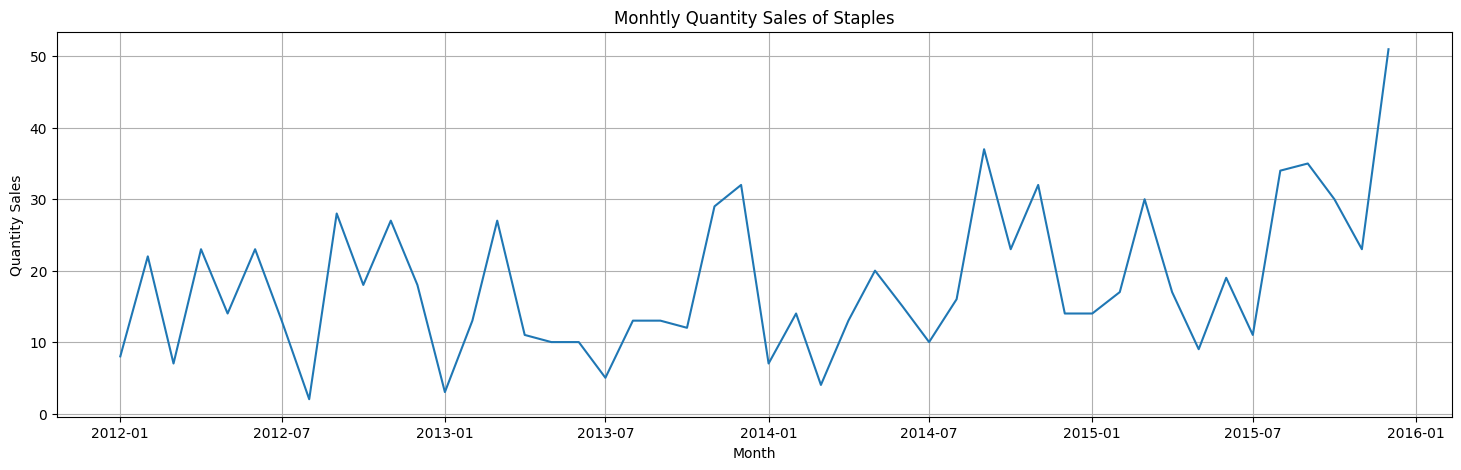

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(staples['month'], staples['Quantity'])
plt.title('Monhtly Quantity Sales of Staples')
plt.xlabel('Month')
plt.ylabel('Quantity Sales')
plt.grid()
plt.show()

# Data Splitting

In [ ]:
train_size = int(len(staples) * 0.8)
train, test = staples[:train_size], staples[train_size:]

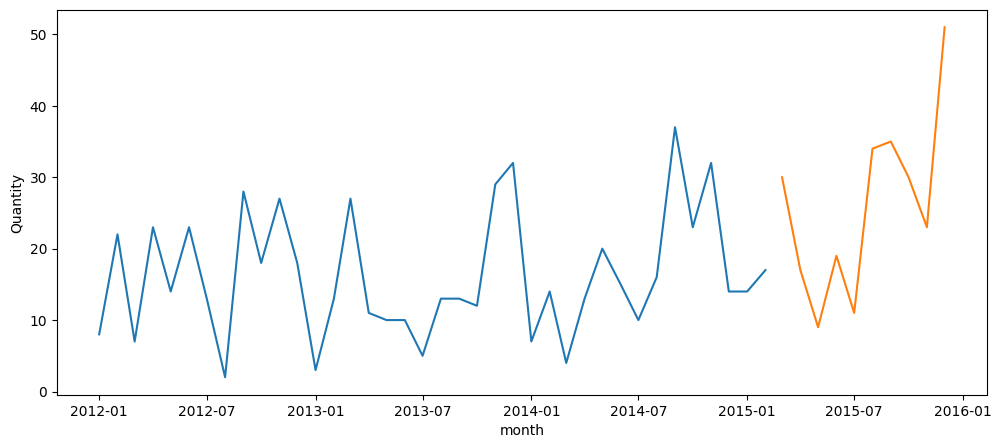

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=train, x=train['month'], y=train['Quantity'])
sns.lineplot(data=test, x=test['month'], y=test['Quantity'])
plt.show()

# Time Series Decomposition

<Figure size 640x480 with 0 Axes>

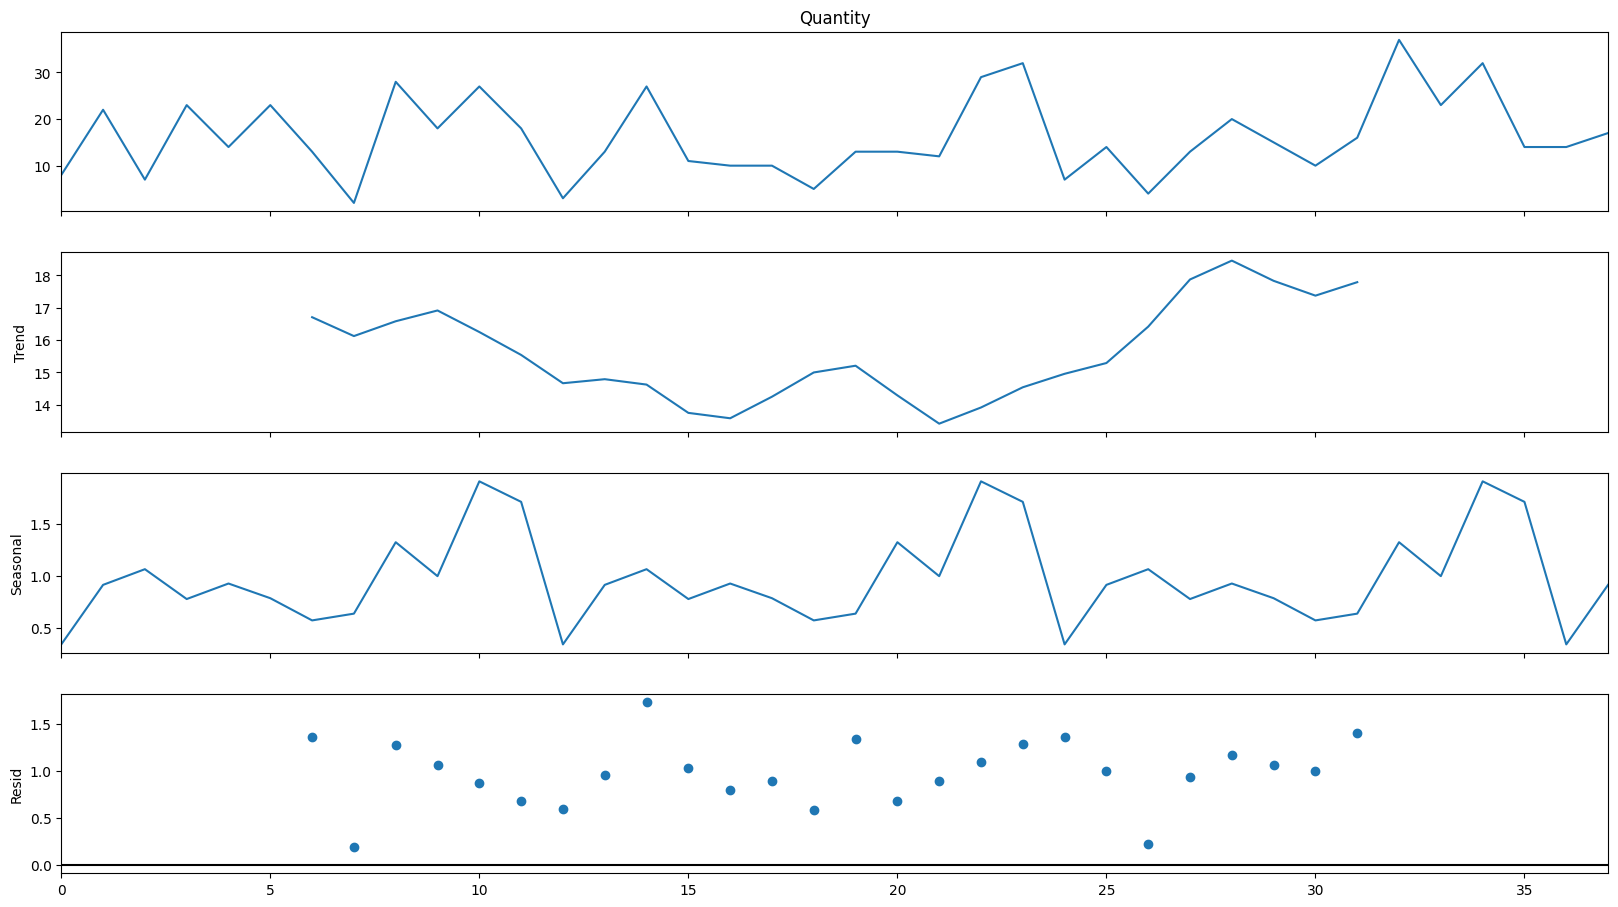

In [ ]:
# Mengidentifikasi komponen musiman, tren, dan residual dalam data.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['Quantity'], model='multiplicative', period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 10)

# Stationary Testing

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(staples['Quantity'])

1. ADF :  0.18387282331222193
2. P-Value :  0.9713424249930084
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 39
5. Critical Values :
	 1% :  -3.610399601308181
	 5% :  -2.939108945868946
	 10% :  -2.6080629651545038


In [ ]:
# Differencing
sales_diff = staples['Quantity'].diff().dropna()

# Uji kembali stasioneritas setelah differencing
adf_test(sales_diff)

1. ADF :  -3.838082881851578
2. P-Value :  0.0025408475317391845
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 39
5. Critical Values :
	 1% :  -3.610399601308181
	 5% :  -2.939108945868946
	 10% :  -2.6080629651545038


# ACF & PACF Analysis

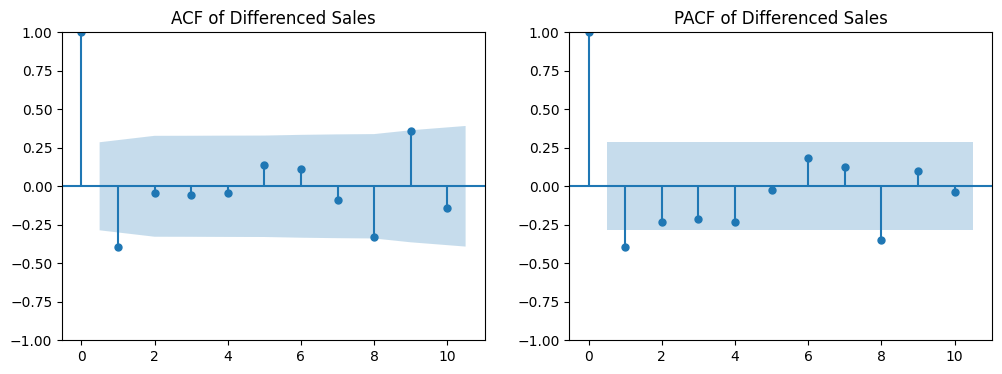

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
# Plot ACF
plot_acf(sales_diff, lags=10, ax=ax[0])
ax[0].set_title('ACF of Differenced Sales')

# Plot PACF
plot_pacf(sales_diff, lags=10, ax=ax[1])
ax[1].set_title('PACF of Differenced Sales')

plt.show()

# Data Modeling

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00


In [ ]:
#auto-fit ARIMA
auto_arima = pm.auto_arima(train['Quantity'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Membangun model ARIMA
model_ar = ARIMA(sales_diff, order=(5, 0, 0))
model_auto_ar = model_ar.fit()

# Menampilkan ringkasan model
print(model_auto_ar.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   47
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -174.907
Date:                Thu, 02 Jan 2025   AIC                            363.815
Time:                        14:11:41   BIC                            376.766
Sample:                             0   HQIC                           368.689
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4660      0.550      0.847      0.397      -0.612       1.544
ar.L1         -0.7532      0.172     -4.379      0.000      -1.090      -0.416
ar.L2         -0.5738      0.214     -2.680      0.0

In [ ]:
# Membangun model ARIMA
model2 = ARIMA(sales_diff, order=(5, 1, 0))
model_fit2 = model2.fit()

# Menampilkan ringkasan model
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                   47
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -177.116
Date:                Thu, 02 Jan 2025   AIC                            366.232
Time:                        14:21:12   BIC                            377.204
Sample:                             0   HQIC                           370.342
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3750      0.172     -8.010      0.000      -1.711      -1.039
ar.L2         -1.3325      0.284     -4.691      0.000      -1.889      -0.776
ar.L3         -1.2076      0.334     -3.615      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


# Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


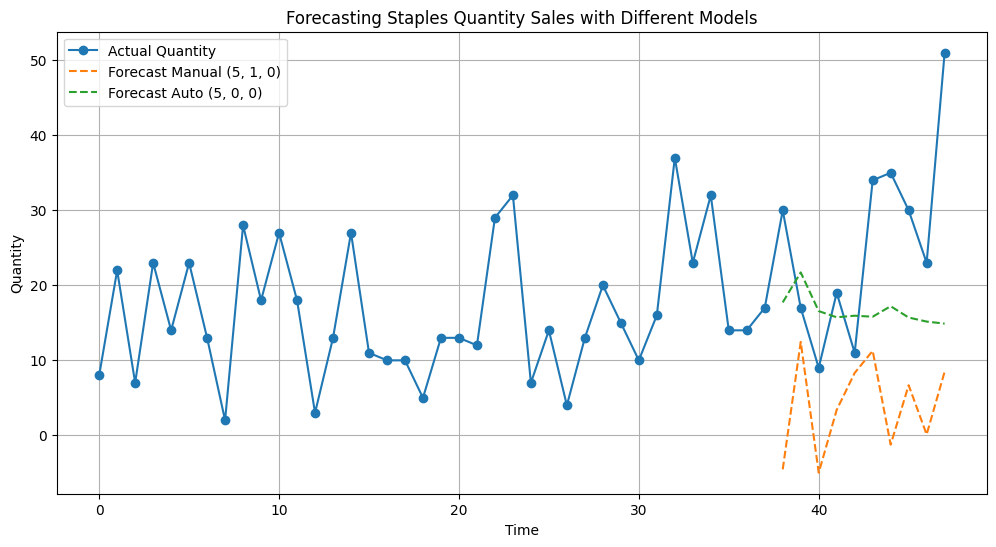

In [ ]:
# Melakukan forecasting
forecast_manual = model_fit2.forecast(len(test['Quantity']))
forecast_auto = auto_arima.predict(len(test['Quantity']))

df_plot = staples.copy()

# Dataframe untuk forecasting
df_plot['forecast_manual'] = [None] * train_size + list(forecast_manual)
df_plot['forecast_auto'] = [None] * train_size + list(forecast_auto)

# Plotting
plt.figure(figsize=(12,6))
plt.plot(df_plot['Quantity'], label='Actual Quantity', marker='o')
plt.plot(df_plot['forecast_manual'], label='Forecast Manual (5, 1, 0)', linestyle='--')
plt.plot(df_plot['forecast_auto'], label='Forecast Auto (5, 0, 0)', linestyle='--')

# Menambahkan label dan legend
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Forecasting Staples Quantity Sales with Different Models')
plt.legend()
plt.grid()
plt.show()

# Model Evaluation

In [ ]:
# Metric Evaluation

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae1 = mean_absolute_error(test['Quantity'], forecast_manual)
mape1 = mean_absolute_percentage_error(test['Quantity'], forecast_manual)
rmse1 = np.sqrt(mean_squared_error(test['Quantity'], forecast_manual))

print('Forecast Manual ARIMA (5, 1, 0)')
print(f'mae - manual: {round(mae1,4)}')
print(f'mape - manual: {round(mape1,4)}')
print(f'rmse - manual: {round(rmse1,4)}')

mae2 = mean_absolute_error(test['Quantity'], forecast_auto)
mape2 = mean_absolute_percentage_error(test['Quantity'], forecast_auto)
rmse2 = np.sqrt(mean_squared_error(test['Quantity'], forecast_auto))

print(f'Forecast Manual AUTO ARIMA(5, 0, 0)')
print(f'mae - manual: {round(mae2,4)}')
print(f'mape - manual: {round(mape2,4)}')
print(f'rmse - manual: {round(rmse2,4)}')

Forecast Manual ARIMA (5, 1, 0)
mae - manual: 21.9018
mape - manual: 0.8346
rmse - manual: 25.2268
Forecast Manual AUTO ARIMA(5, 0, 0)
mae - manual: 12.6972
mape - manual: 0.4717
rmse - manual: 15.7529


# Forecase for Future

In [ ]:
#Apply model to forecast data
model = ARIMA(staples['Quantity'], order=(5, 0, 0))
model_fit = model.fit()
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)
forecast_rounded = forecast.round()
print(forecast_rounded)

48    29.0
49    27.0
50    24.0
51    23.0
52    25.0
53    22.0
Name: predicted_mean, dtype: float64


In [ ]:
last_month = staples['month'].iloc[-1].strftime('%Y-%m')

# Menghitung bulan berikutnya
last_year, last_m = int(last_month[:4]), int(last_month[5:])
forecast_months = []

for i in range(1, forecast_steps + 1):
    next_m = (last_m + i - 1) % 12 + 1
    next_year = last_year + (last_m + i - 1) // 12
    forecast_months.append(f"{next_year}-{str(next_m).zfill(2)}")

forecast2 = pd.DataFrame({
    'month': forecast_months,
    'Quantity': forecast_rounded
})

print(forecast2)

      month  Quantity
48  2016-01      29.0
49  2016-02      27.0
50  2016-03      24.0
51  2016-04      23.0
52  2016-05      25.0
53  2016-06      22.0


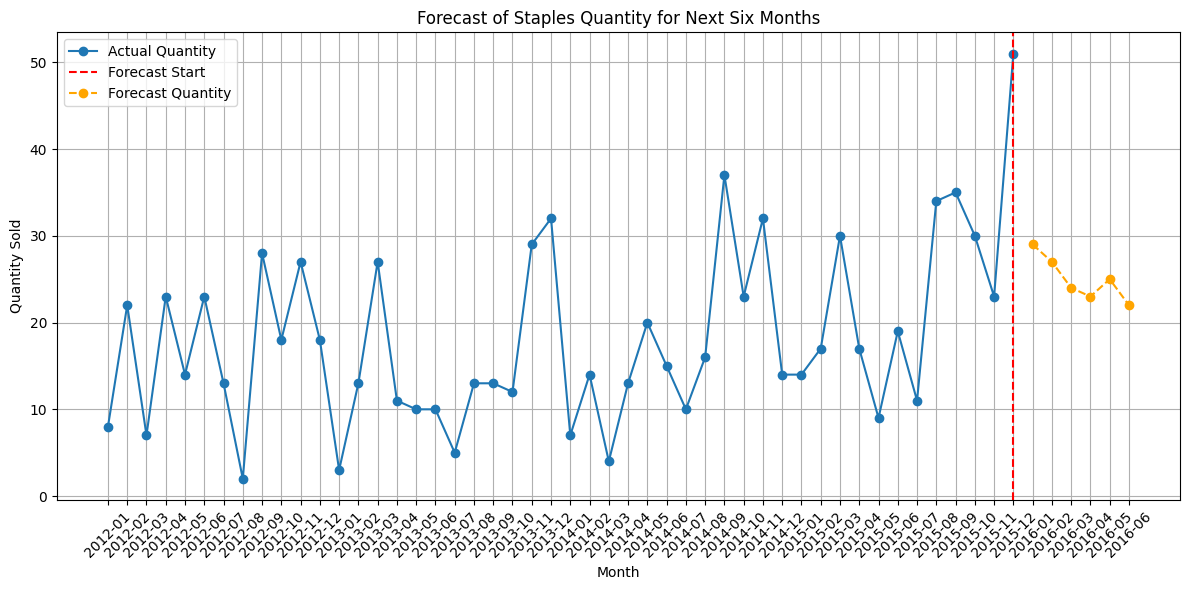

In [ ]:
staples['month'] = pd.to_datetime(staples['month']).dt.strftime('%Y-%m')
staples['month'] = staples['month'].astype(str)
forecast2['month'] = forecast2['month'].astype(str)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(staples['month'], staples['Quantity'], label='Actual Quantity', marker='o')
plt.axvline(x=staples['month'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.plot(forecast2['month'], forecast2['Quantity'], label='Forecast Quantity', linestyle='--', marker='o', color='orange')

plt.title('Forecast of Staples Quantity for Next Six Months')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()